# importing the necessary package

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import string
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.stats import zscore
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data dictionary file to understand the features
data = pd.read_excel('/content/data dictionary.xlsx')
data

,Attribute,Description
0,Name,The brand and model of the car
1,Location,The location in which the car is being sold or...
2,Year,The year or edition of the model
3,Kilometers_Driven,The total kilometers driven in the car by the ...
4,Fuel_Type,The type of fuel used by the car
5,Transmission,The type of transmission used by the car
6,Owner_Type,"Whether the ownership is Firsthand, Second han..."
7,Mileage,The standard mileage offered by the car compan...
8,Engine,The displacement volume of the engine in cc
9,Power,The maximum power of the engine in bhp


In [3]:
# Reading the train and test data into a pandas dataframe

train_data = pd.read_csv("/content/train.csv", index_col=False)
test_data = pd.read_csv("/content/test.csv", index_col=False)

In [4]:
train_data = train_data.iloc[:,1:]
test_data = test_data.iloc[:,1:]

In [ ]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
print("Shape of Train data is :", train_data.shape)
print("Shape of Test data is :", test_data.shape)

Shape of Train data is : (6019, 13)
Shape of Test data is : (1234, 12)


In [6]:
org_data= train_data.copy()

In [7]:
org_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [ ]:
train_data.duplicated().sum()

0

In [8]:
unique_counts1 = []

for col in train_data.columns:
    unique_counts1.append((col, train_data[col].nunique()))
unique_counts1 = sorted(unique_counts1, key=lambda x:x[1], reverse=True)

print("No of unique values in each columns are as follows :(In Descending order)\n")

for col, nunique in unique_counts1:
    print(f"{col}:{nunique}: {round(nunique/6019*100,2)}%")

No of unique values in each columns are as follows :(In Descending order)

Kilometers_Driven:3093: 51.39%
Name:1876: 31.17%
Price:1373: 22.81%
New_Price:540: 8.97%
Mileage:442: 7.34%
Power:372: 6.18%
Engine:146: 2.43%
Year:22: 0.37%
Location:11: 0.18%
Seats:9: 0.15%
Fuel_Type:5: 0.08%
Owner_Type:4: 0.07%
Transmission:2: 0.03%


# Missing value analysis

In [9]:
def get_missing_data_details(df):
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False,)
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    missing = missing[missing['Percent']>0]

    plt.figure(figsize=(5,5))
    sns.barplot(missing['Percent'], missing.index)
    plt.xlabel('Feature', fontsize=15)
    plt.ylabel("Percentage", fontsize=15)
    plt.title("Missing Data %", fontsize=15)

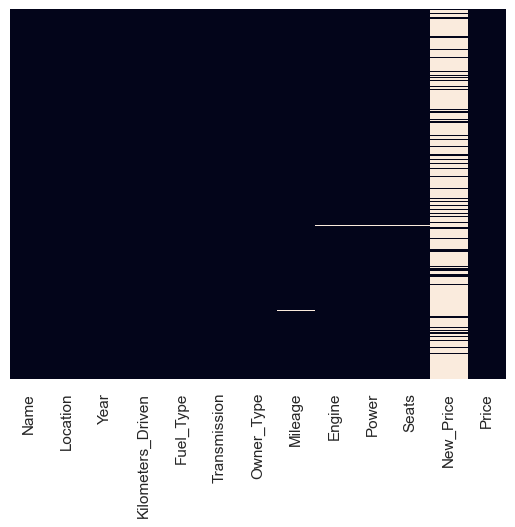

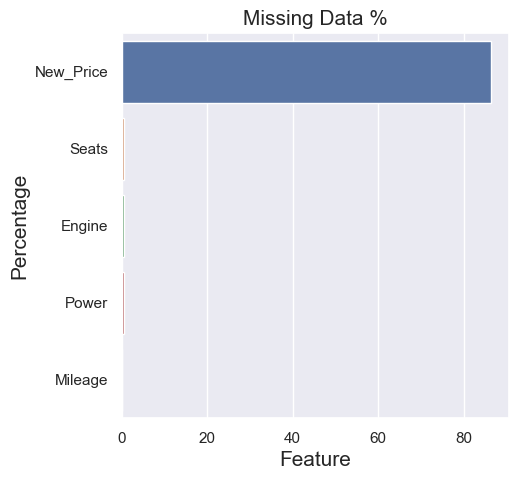

In [ ]:
get_missing_data_details(train_data)

In [10]:
for col in train_data.columns:
    if train_data[col].isnull().sum()!=0:
        print(f"{col}: {train_data[col].isnull().sum()}:{round(train_data[col].isnull().mean()*100, 2)}%")

Mileage: 2:0.03%
Engine: 36:0.6%
Power: 36:0.6%
Seats: 42:0.7%
New_Price: 5195:86.31%


In [11]:
train_data.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [ ]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [12]:
def analyse_columnwise_data(data):
    ana = data.str.findall('[a-zA-Z]+',)
    ana = [x[0] for x in ana if x is not np.nan]
    return set(ana)

def get_brand(s):
    return s.split()[0]
def get_model(s):
    return s.split()[1]

In [ ]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [ ]:
train_data['Name'][100]

'Hyundai i20 1.4 CRDi Sportz'

In [13]:
train_data['Brand'] = train_data['Name'].apply(get_brand)
train_data['Model'] = train_data['Name'].apply(get_model)

In [14]:
analyse_columnwise_data(train_data['New_Price'])

{'Cr', 'Lakh'}

In [15]:
analyse_columnwise_data(train_data['Mileage'])

{'km', 'kmpl'}

In [16]:
analyse_columnwise_data(train_data['Engine'])

{'CC'}

In [17]:
analyse_columnwise_data(train_data['Power'])

{'bhp', 'null'}

In [18]:
train_data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35,Hyundai,EON
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,Nissan,Micra
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,Toyota,Innova
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20,Volkswagen,Vento
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95,Tata,Indica


In [19]:
def convert_new_price(s):
    if type(s)==str:
        s = s.lower()
        if 'lakh' in s:
            s = s.strip("lakh")
            s = float(s)
        elif "cr" in s:
            s = s.strip("cr")
            s = float(s)*100
        return s

In [20]:
train_data['New_Price_Converted'] = train_data['New_Price'].apply(convert_new_price)

In [ ]:
# export the data for analysis purpose
# train_data.to_csv('new_car.csv')

In [21]:
def adjust_mileage(s):
    if type(s) == str:
        s = s.lower()
        if 'kmpl' in s:
            s = s.strip('kmpl')
        if 'km/kg' in s:
            s = s.strip('km/kg')
            s = float(s)*1.8
    return s

In [ ]:
train_data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,New_Price_Converted
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta,NaN


In [22]:
train_data.describe(include='all')
train_data['Year_converted'] = train_data['Year'].astype('str')
train_data['Engine_converted'] = train_data['Engine'].str.strip('CC').astype('float')

train_data['Mileage_converted'] = train_data['Mileage'].apply(adjust_mileage)
train_data['Mileage_converted'] = train_data['Mileage_converted'].astype('float')

train_data['Power'] = train_data['Power'].str.strip('bhp')
train_data['Power'] = pd.to_numeric(train_data['Power'],errors='coerce')

In [ ]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,New_Price_Converted,Year_converted,Engine_converted,Mileage_converted
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5.0,NaN,1.75,Maruti,Wagon,NaN,2010,998.0,47.88
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5.0,NaN,12.50,Hyundai,Creta,NaN,2015,1582.0,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz,8.61,2011,1199.0,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76,7.0,NaN,6.00,Maruti,Ertiga,NaN,2012,1248.0,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.80,5.0,NaN,17.74,Audi,A4,NaN,2013,1968.0,15.20


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 6019 non-null   object 
 1   Location             6019 non-null   object 
 2   Year                 6019 non-null   int64  
 3   Kilometers_Driven    6019 non-null   int64  
 4   Fuel_Type            6019 non-null   object 
 5   Transmission         6019 non-null   object 
 6   Owner_Type           6019 non-null   object 
 7   Mileage              6017 non-null   object 
 8   Engine               5983 non-null   object 
 9   Power                5876 non-null   float64
 10  Seats                5977 non-null   float64
 11  New_Price            824 non-null    object 
 12  Price                6019 non-null   float64
 13  Brand                6019 non-null   object 
 14  Model                6019 non-null   object 
 15  New_Price_Converted  824 non-null    f

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Name                 6019 non-null   object  
 1   Location             6019 non-null   object  
 2   Year                 6019 non-null   int64   
 3   Kilometers_Driven    6019 non-null   int64   
 4   Fuel_Type            6019 non-null   object  
 5   Transmission         6019 non-null   object  
 6   Owner_Type           6019 non-null   object  
 7   Mileage              6017 non-null   object  
 8   Engine               5983 non-null   object  
 9   Power                5876 non-null   float64 
 10  Seats                5977 non-null   category
 11  New_Price            824 non-null    object  
 12  Price                6019 non-null   float64 
 13  Brand                6019 non-null   object  
 14  Model                6019 non-null   object  
 15  New_Price_Converted  

In [28]:
train_data['Seats'] = train_data['Seats'].astype('category')

In [24]:
train_data.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,New_Price_Converted,Year_converted,Engine_converted,Mileage_converted
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5876.000000,5977.000000,824,6019.000000,6019,6019,824.000000,6019,5983.000000,6017.000000
unique,1876,11,NaN,NaN,5,2,4,442,146,NaN,NaN,540,NaN,31,212,NaN,22,NaN,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,NaN,NaN,95.13 Lakh,NaN,Maruti,Swift,NaN,2014,NaN,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,NaN,NaN,6,NaN,1211,353,NaN,797,NaN,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,113.253050,5.278735,NaN,9.479468,NaN,NaN,23.075655,NaN,1621.276450,18.349986
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,53.874957,0.808840,NaN,11.187917,NaN,NaN,26.182412,NaN,601.355233,5.370554
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,34.200000,0.000000,NaN,0.440000,NaN,NaN,3.910000,NaN,72.000000,0.000000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,75.000000,5.000000,NaN,3.500000,NaN,NaN,7.977500,NaN,1198.000000,15.260000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,97.700000,5.000000,NaN,5.640000,NaN,NaN,11.670000,NaN,1493.000000,18.190000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,138.100000,5.000000,NaN,9.950000,NaN,NaN,26.560000,NaN,1984.000000,21.100000


In [26]:
train_data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,New_Price_Converted,Year_converted,Engine_converted,Mileage_converted
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5.0,NaN,1.75,Maruti,Wagon,NaN,2010,998.0,47.88
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5.0,NaN,12.50,Hyundai,Creta,NaN,2015,1582.0,19.67


# Univariate Analysis

In [30]:
numerical = ['Kilometers_Driven','Price','New_Price_Converted','Engine_converted','Mileage_converted','Power','Year']
categorical = ['Location','Fuel_Type','Transmission','Owner_Type','Seats','Brand','Model','Year_converted']

In [31]:
print(train_data['Location'].unique())
print(train_data['Fuel_Type'].unique())
print(train_data['Transmission'].unique())
print(train_data['Owner_Type'].unique())
print(train_data['Seats'].unique())
print(train_data['Brand'].unique())
print(train_data['Model'].unique())
print(train_data['Year_converted'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']
[5.0, 7.0, 8.0, 4.0, 6.0, 2.0, NaN, 10.0, 9.0, 0.0]
Categories (9, float64): [0.0, 2.0, 4.0, 5.0, ..., 7.0, 8.0, 9.0, 10.0]
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']
['Wagon' 'Creta' 'Jazz' 'Ertiga' 'A4' 'EON' 'Micra' 'Innova' 'Vento'
 'Indica' 'Ciaz' 'City' 'Swift' 'Rover' 'Pajero' 'Amaze' 'Duster' 'New'
 '3' 'S' 'A6' 'i20' 'Alto' 'WRV' 'Corolla' 'Ssangyong' 'Vitara' 'KUV'
 'M-Class' 'Polo' 'Nano' 'Elantra' 'Xcent' 'Thar' 'Grand' 'KWID' 'i10'
 'X-Trail' 'Zen' 'Figo' 'C-Class' 'Cayenne' 'XUV500' 'Terrano' 'Brio'
 'Fiest

In [36]:
"""
fig = px.bar(title="Car Brand and Models", x = train_data['Brand'].str.strip(),
             color = train_data['Model'].str.strip(), barmode = 'overlay', opacity=0.5, width=1000, height=500)
fig.show()
"""

'\nfig = px.bar(title="Car Brand and Models", x = train_data[\'Brand\'].str.strip(), \n             color = train_data[\'Model\'].str.strip(), barmode = \'overlay\', opacity=0.5, width=1000, height=500)\nfig.show()\n'

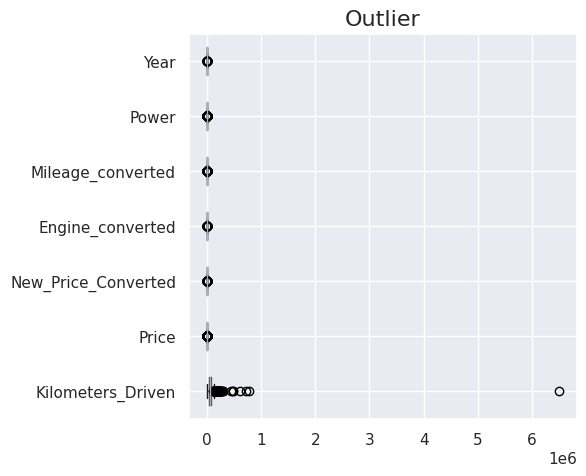

In [33]:
plt.figure(figsize=(5,5))
train_data[numerical].boxplot(vert=0)
plt.title("Outlier", fontsize=16)
plt.show()

In [34]:
train_data[numerical].max().sort_values()

Mileage_converted           60.372
Price                      160.000
New_Price_Converted        230.000
Power                      560.000
Year                      2019.000
Engine_converted          5998.000
Kilometers_Driven      6500000.000
dtype: float64

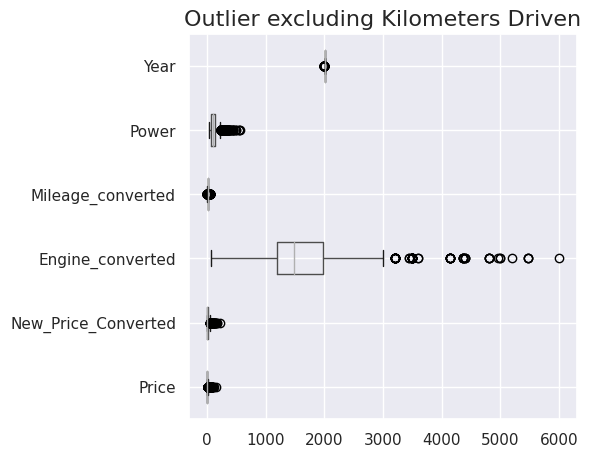

In [35]:
plt.figure(figsize=(5,5))
train_data[numerical].drop(['Kilometers_Driven'], axis=1).boxplot(vert=0)
plt.title("Outlier excluding Kilometers Driven", fontsize=16)
plt.show()

In [41]:
# Number of outliers

def outlier_check(data, n):
  for col in data.columns:
    if data[col].dtype == 'int64' or data[col].dtype=='float64' :
      Q1 = data[col].quantile(0.25)
      Q3 = data[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_range = Q1 - (n * IQR)
      upper_range = Q3 + (n * IQR)
      #print(f"{style.BOLD}{col}{style.END}")
      print("Number of outliers :", data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])
      #print("Percentage of outliers :{0:10.3f}".format(((data[data[col]> upper_range) | (data[col] < lower_range)].shape[0])/data.shape[0])*100), "%\n")


In [42]:
outlier_check(train_data, 1.5)

Number of outliers : 50
Number of outliers : 202
Number of outliers : 238
Number of outliers : 718
Number of outliers : 86
Number of outliers : 61
Number of outliers : 125


In [43]:
train_data.shape

(6019, 19)

In [44]:
718/6019*100

11.928891842498754

In [46]:
238/6019*100

3.954145206844991

# Bivariate Analysis

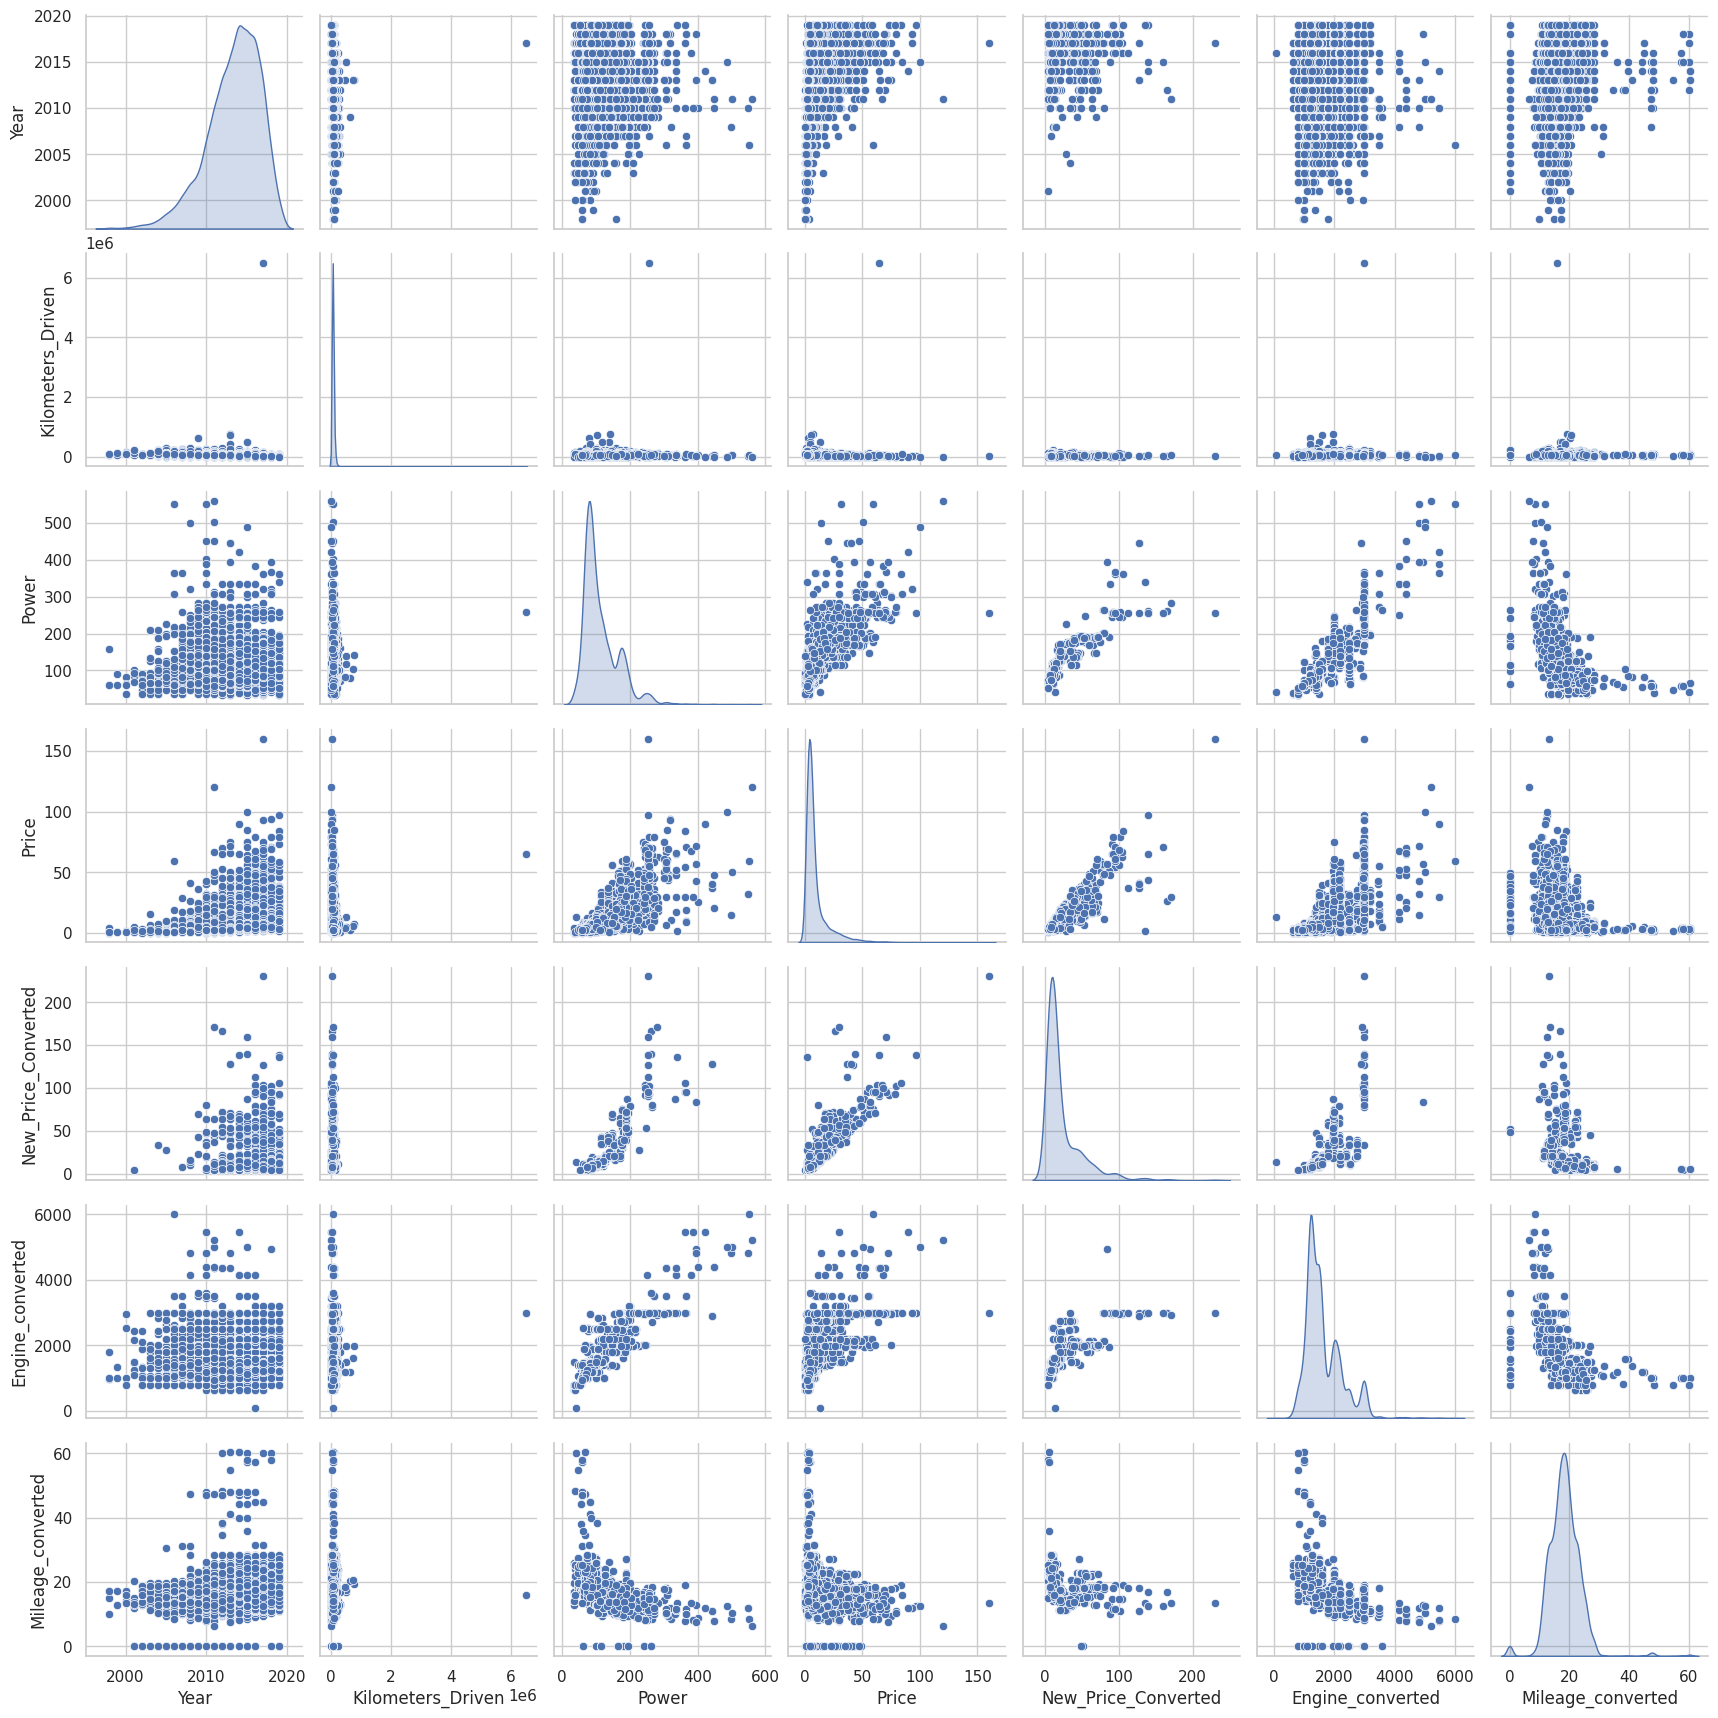

In [47]:
sns.set_style('whitegrid')
sns.pairplot(data=train_data, diag_kind='kde')
plt.show()

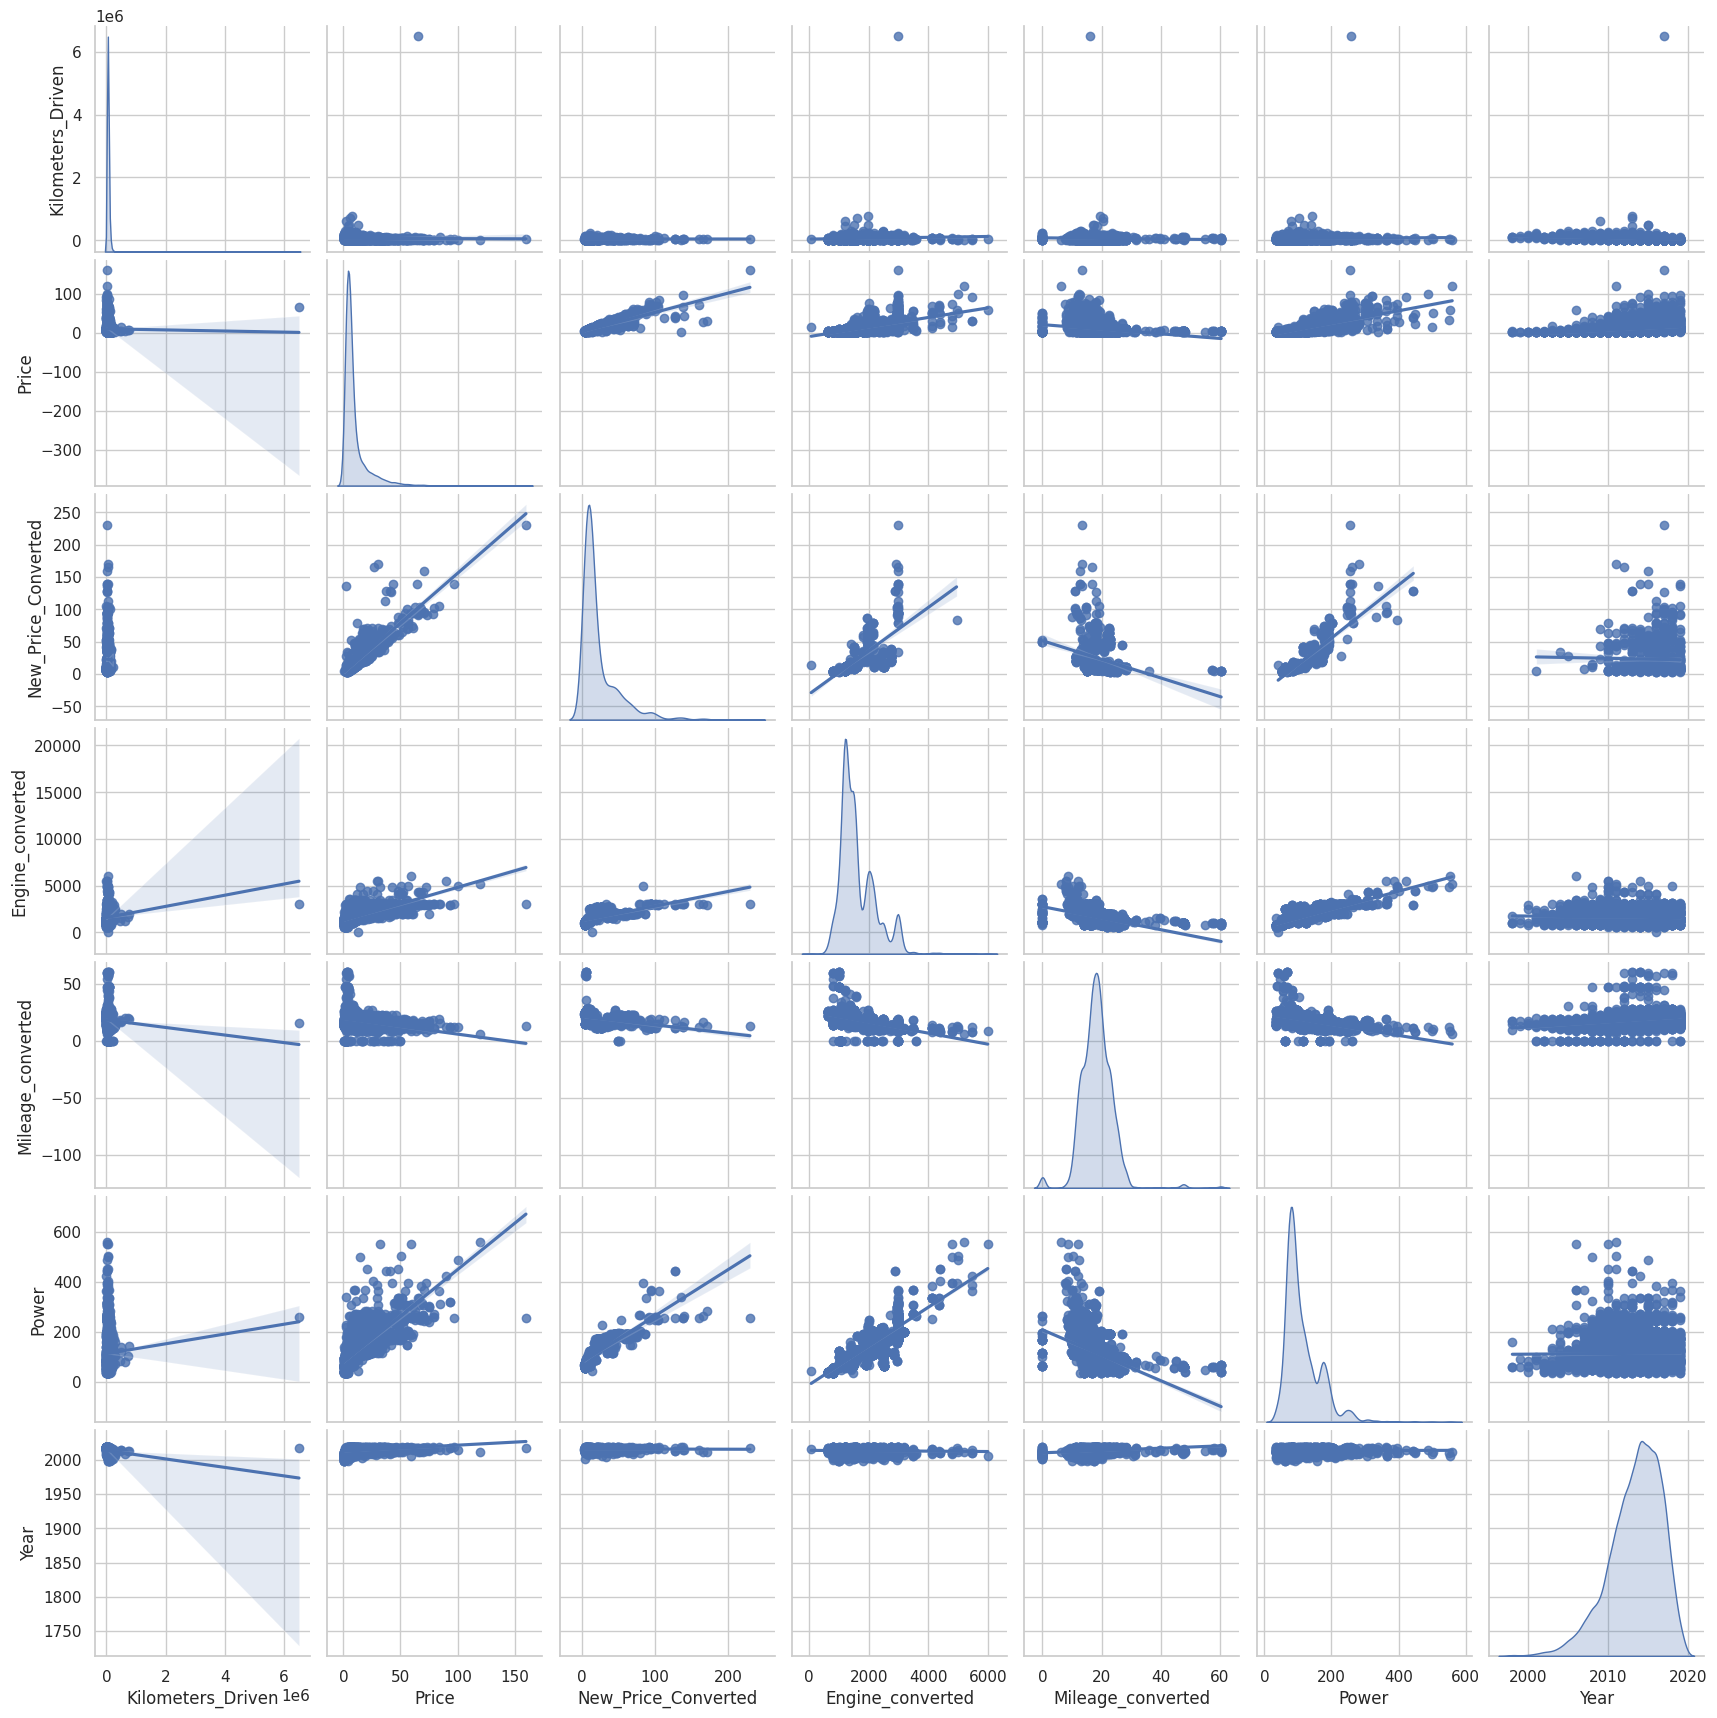

In [48]:
sns.pairplot(data=train_data[numerical],kind='reg', diag_kind='kde')

<Axes: >

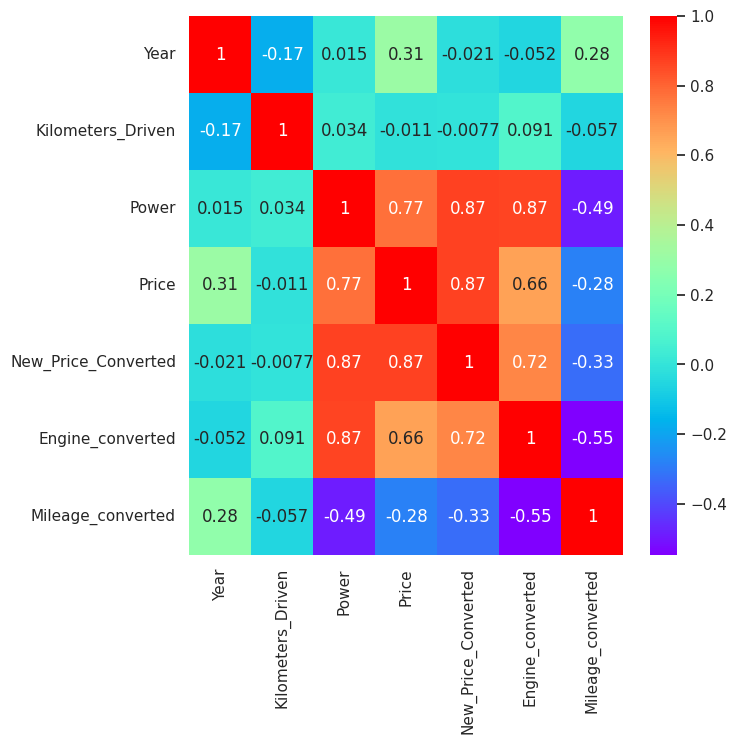

In [49]:
plt.figure(figsize=(7,7))
sns.heatmap(train_data.corr(), annot=True, cmap='rainbow')

In [50]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'New_Price_Converted',
       'Year_converted', 'Engine_converted', 'Mileage_converted'],
      dtype='object')

<Axes: xlabel='Fuel_Type', ylabel='Price'>

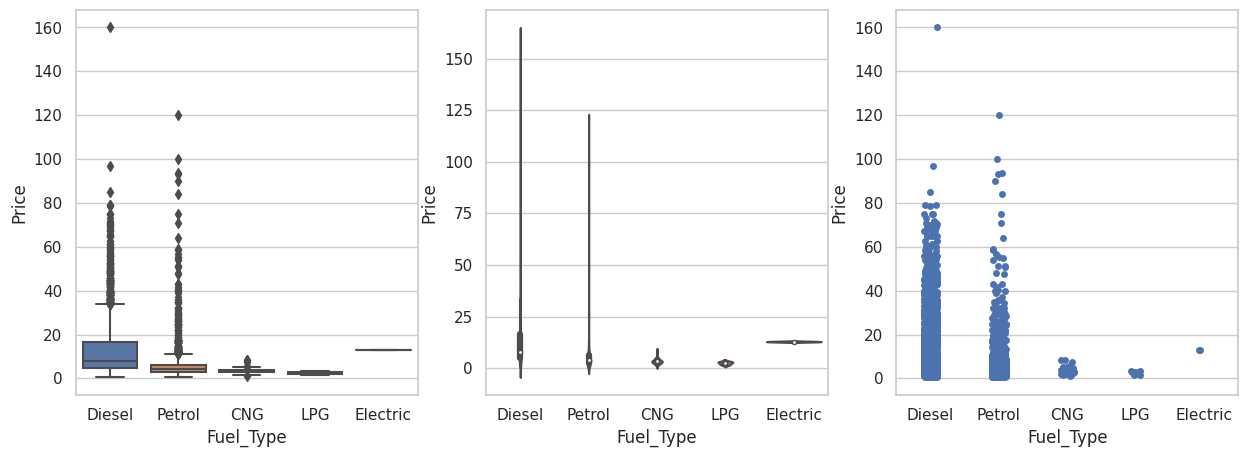

In [51]:
x = 'Fuel_Type'
y = 'Price'
order = train_data[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x = train_data[x], y=train_data[y], data=train_data, order=order)

<Axes: xlabel='Owner_Type', ylabel='Price'>

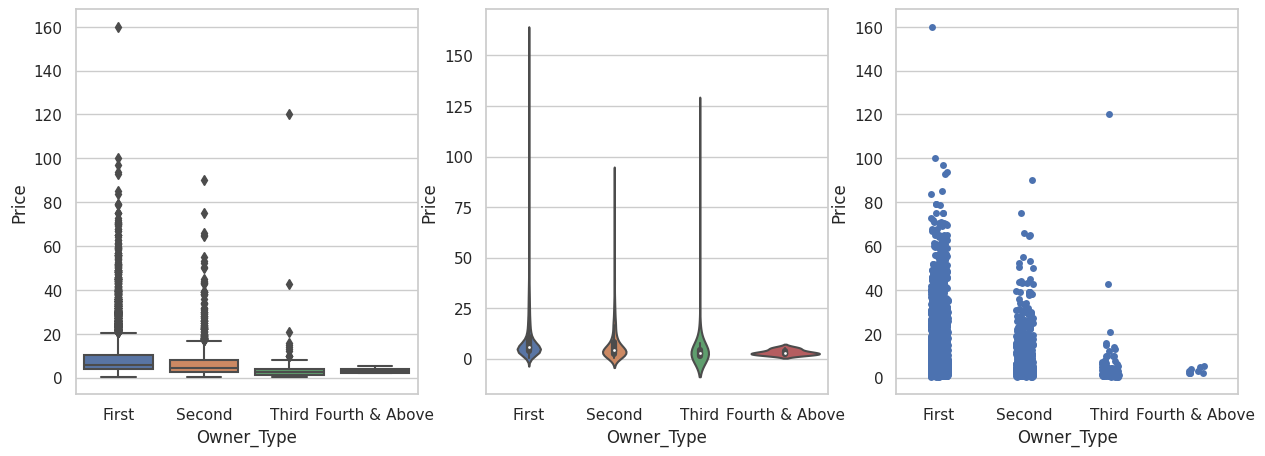

In [52]:
x = 'Owner_Type'
y = 'Price'
order = train_data[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x = train_data[x], y=train_data[y], data=train_data, order=order)

<Axes: xlabel='Fuel_Type', ylabel='Mileage_converted'>

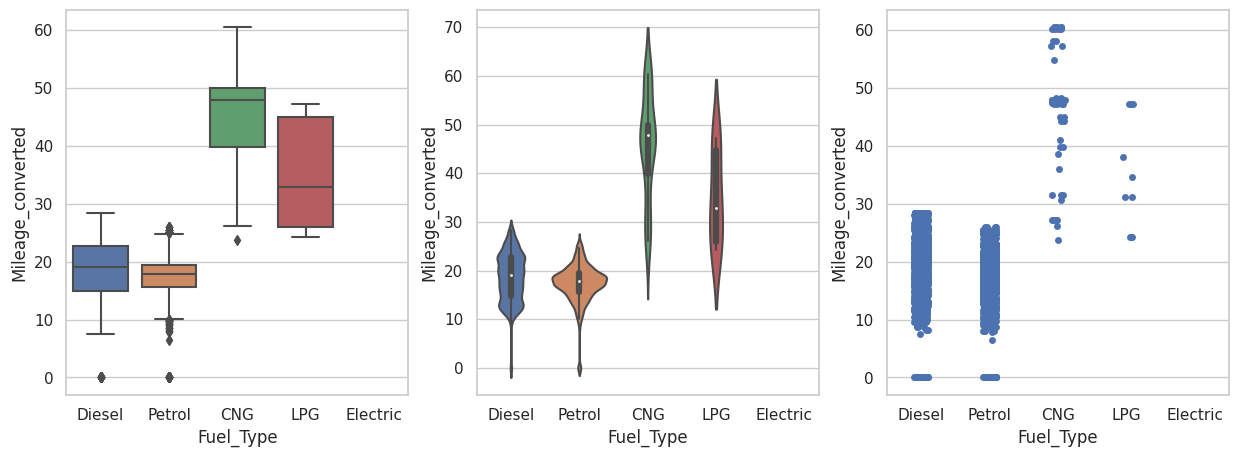

In [53]:
x = 'Fuel_Type'
y = 'Mileage_converted'
order = train_data[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x = train_data[x], y=train_data[y], data=train_data, order=order)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Diesel'),
  Text(1, 0, 'Petrol'),
  Text(2, 0, 'CNG'),
  Text(3, 0, 'LPG'),
  Text(4, 0, 'Electric')])

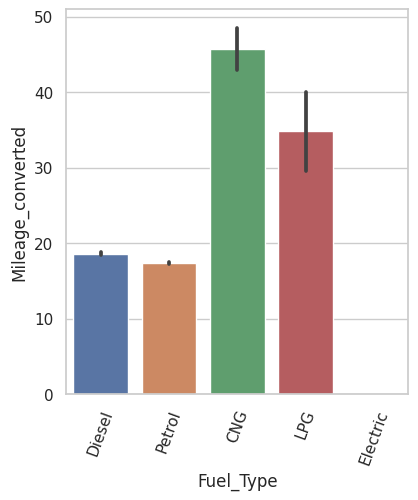

In [54]:
x = 'Fuel_Type'
y = 'Mileage_converted'
order = train_data[x].value_counts().index
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x = train_data[x], y=train_data[y], data=train_data, order=order)
plt.xticks(rotation=70)

# Multivariate Analysis

In [55]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'New_Price_Converted',
       'Year_converted', 'Engine_converted', 'Mileage_converted'],
      dtype='object')

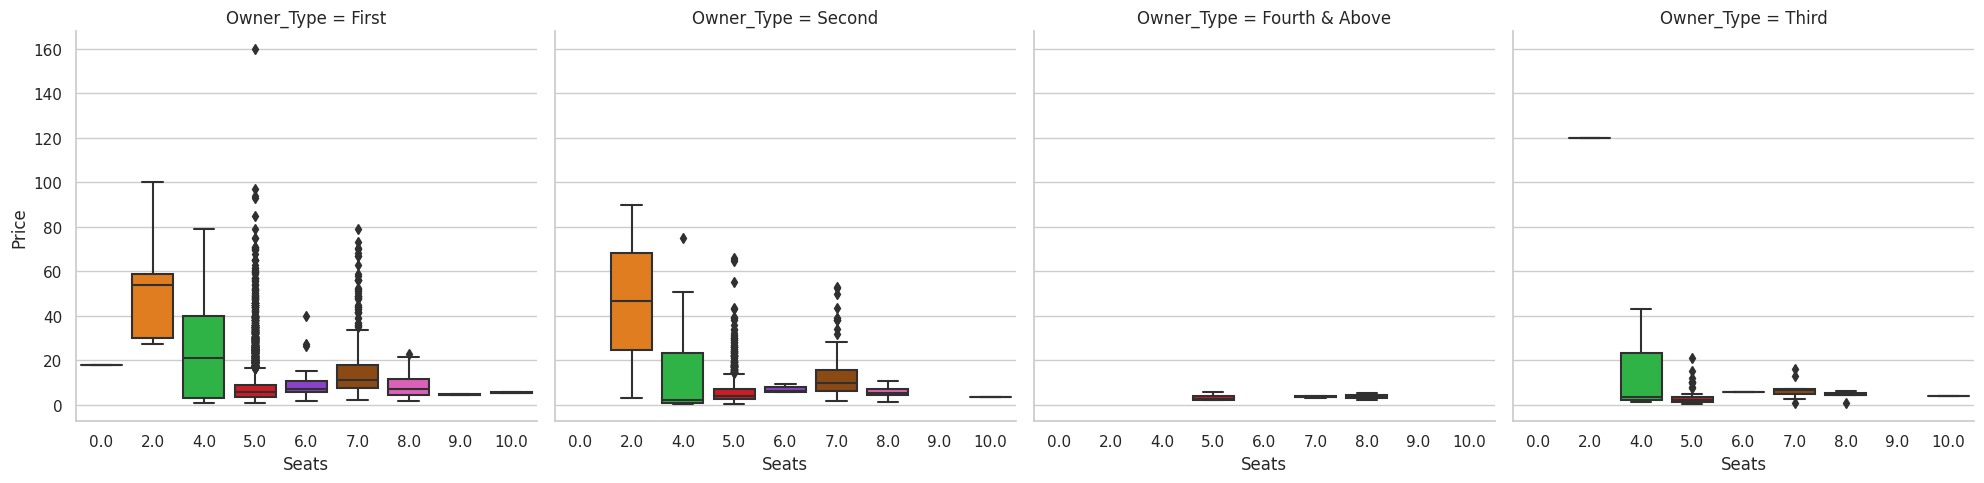

In [57]:
f = sns.catplot(x='Seats', y = 'Price', col='Owner_Type', col_wrap=4, data=train_data, kind='box',ci=False,
                   palette='bright', aspect=1)

In [58]:
train_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'New_Price_Converted',
       'Year_converted', 'Engine_converted', 'Mileage_converted'],
      dtype='object')

In [59]:
pd.crosstab(train_data.Fuel_Type, train_data.Transmission, margins= True, values=train_data.Price, aggfunc='mean')

Transmission,Automatic,Manual,All
Fuel_Type,,,
CNG,NaN,3.516786,3.516786
Diesel,24.583078,6.636190,12.840605
Electric,12.875000,NaN,12.875000
LPG,NaN,2.487000,2.487000
Petrol,11.258738,4.113947,5.701100
All,19.843971,5.332703,9.479468


# Data Preprocessing

In [73]:
data_new = train_data.copy()

In [74]:
data_new.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'New_Price_Converted',
       'Year_converted', 'Engine_converted', 'Mileage_converted'],
      dtype='object')

In [75]:
print(train_data.shape)
data_new.drop(['Name','Year','Mileage','Engine','New_Price'], axis=1, inplace=True)
print(data_new.shape)

(6019, 19)
(6019, 14)


In [76]:
# check duplicate data
data_new.duplicated().sum()

1

In [79]:
data_new=data_new.drop_duplicates(ignore_index=True)

In [80]:
data_new.duplicated().sum()

0

In [81]:
data_new[(data_new['Seats']==0.0) | (data_new['Mileage_converted']==0.0)].shape

(69, 14)

In [82]:
data_new.isnull().sum()

Location                  0
Kilometers_Driven         0
Fuel_Type                 0
Transmission              0
Owner_Type                0
Power                   143
Seats                    42
Price                     0
Brand                     0
Model                     0
New_Price_Converted    5194
Year_converted            0
Engine_converted         36
Mileage_converted         2
dtype: int64

In [83]:
round((data_new.isnull().sum()/data_new.shape[0])*100,2)

Location                0.00
Kilometers_Driven       0.00
Fuel_Type               0.00
Transmission            0.00
Owner_Type              0.00
Power                   2.38
Seats                   0.70
Price                   0.00
Brand                   0.00
Model                   0.00
New_Price_Converted    86.31
Year_converted          0.00
Engine_converted        0.60
Mileage_converted       0.03
dtype: float64

In [84]:
data_new.drop(['New_Price_Converted'], axis=1, inplace=True)
data_new.shape

(6018, 13)

In [94]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6018 entries, 0 to 6017
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6018 non-null   object  
 1   Kilometers_Driven  6018 non-null   int64   
 2   Fuel_Type          6018 non-null   object  
 3   Transmission       6018 non-null   object  
 4   Owner_Type         6018 non-null   object  
 5   Power              6018 non-null   float64 
 6   Seats              5976 non-null   category
 7   Price              6018 non-null   float64 
 8   Brand              6018 non-null   object  
 9   Model              6018 non-null   object  
 10  Year_converted     6018 non-null   object  
 11  Engine_converted   6018 non-null   float64 
 12  Mileage_converted  6018 non-null   float64 
dtypes: category(1), float64(4), int64(1), object(7)
memory usage: 570.6+ KB


<Axes: ylabel='Mileage_converted'>

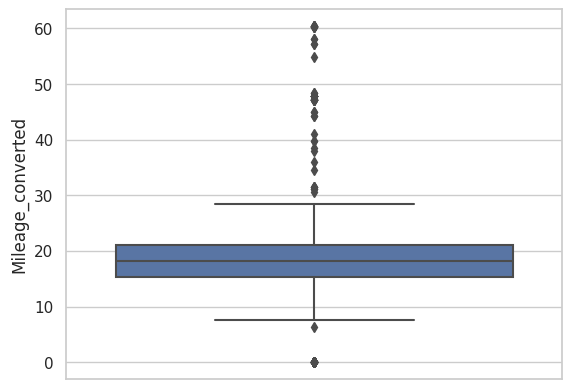

In [90]:
sns.boxplot(y='Mileage_converted', data=data_new)

In [87]:
data_new['Power'] = data_new['Power'].fillna(data_new['Power'].median())

In [89]:
data_new['Engine_converted'] = data_new['Engine_converted'].fillna(data_new['Engine_converted'].median())

In [91]:
data_new['Mileage_converted'] = data_new['Mileage_converted'].fillna(data_new['Mileage_converted'].median())

In [92]:
data_new['Seats'].mode()

0    5.0
Name: Seats, dtype: category
Categories (9, float64): [0.0, 2.0, 4.0, 5.0, ..., 7.0, 8.0, 9.0, 10.0]

In [97]:
data_new['Seats'] = data_new['Seats'].fillna(5.0)

In [95]:
round((data_new.isnull().sum()/data_new.shape[0])*100,2)

Location             0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Power                0.0
Seats                0.7
Price                0.0
Brand                0.0
Model                0.0
Year_converted       0.0
Engine_converted     0.0
Mileage_converted    0.0
dtype: float64

In [98]:
data_new.isnull().sum()

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Power                0
Seats                0
Price                0
Brand                0
Model                0
Year_converted       0
Engine_converted     0
Mileage_converted    0
dtype: int64

In [99]:
# Outlier Treatment
outlier_check(data_new, 1.5)

Number of outliers : 202
Number of outliers : 239
Number of outliers : 718
Number of outliers : 61
Number of outliers : 125


In [107]:
def remove_outlier(col):
  sorted(col)
  Q1, Q3 = np.percentile(col,[25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

In [105]:
data_outlier = data_new.copy()

In [106]:
data_outlier.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,Price,Brand,Model,Year_converted,Engine_converted,Mileage_converted
0,Mumbai,72000,CNG,Manual,First,58.16,5.0,1.75,Maruti,Wagon,2010,998.0,47.88
1,Pune,41000,Diesel,Manual,First,126.20,5.0,12.50,Hyundai,Creta,2015,1582.0,19.67
2,Chennai,46000,Petrol,Manual,First,88.70,5.0,4.50,Honda,Jazz,2011,1199.0,18.20
3,Chennai,87000,Diesel,Manual,First,88.76,7.0,6.00,Maruti,Ertiga,2012,1248.0,20.77
4,Coimbatore,40670,Diesel,Automatic,Second,140.80,5.0,17.74,Audi,A4,2013,1968.0,15.20


In [108]:
for column in data_outlier.drop(['Price','Seats'], axis=1).columns:
  if data_outlier[column].dtype !='object':
    lr, ur = remove_outlier(data_outlier[column])
    data_outlier[column] = np.where(data_outlier[column] > ur, ur, data_outlier[column])
    data_outlier[column] = np.where(data_outlier[column] < lr, lr, data_outlier[column])

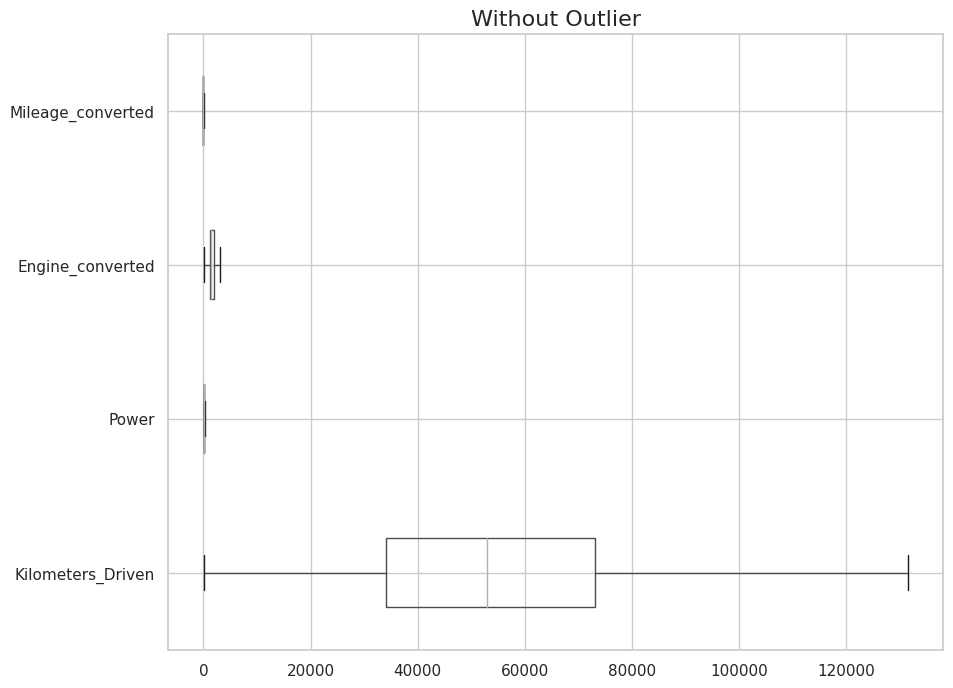

In [109]:
plt.figure(figsize=(10,8))
plt.title("Without Outlier", fontsize=16)
data_outlier.drop(['Price','Seats'], axis=1).boxplot(vert=0)
plt.show()

In [114]:
dataset = data_outlier.copy()

In [111]:
dataset.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,Price,Brand,Model,Year_converted,Engine_converted,Mileage_converted
0,Mumbai,72000.0,CNG,Manual,First,58.16,5.0,1.75,Maruti,Wagon,2010,998.0,29.86
1,Pune,41000.0,Diesel,Manual,First,126.20,5.0,12.50,Hyundai,Creta,2015,1582.0,19.67
2,Chennai,46000.0,Petrol,Manual,First,88.70,5.0,4.50,Honda,Jazz,2011,1199.0,18.20
3,Chennai,87000.0,Diesel,Manual,First,88.76,7.0,6.00,Maruti,Ertiga,2012,1248.0,20.77
4,Coimbatore,40670.0,Diesel,Automatic,Second,140.80,5.0,17.74,Audi,A4,2013,1968.0,15.20


In [115]:
dataset = pd.get_dummies(dataset, columns=['Location','Fuel_Type','Transmission','Owner_Type','Seats','Brand','Model'], drop_first=True)

In [116]:
dataset.head()

,Kilometers_Driven,Power,Price,Year_converted,Engine_converted,Mileage_converted,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO
0,72000.0,58.16,1.75,2010,998.0,29.86,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000.0,126.20,12.50,2015,1582.0,19.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46000.0,88.70,4.50,2011,1199.0,18.20,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87000.0,88.76,6.00,2012,1248.0,20.77,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40670.0,140.80,17.74,2013,1968.0,15.20,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
# Split the data into ind and dep variable
x = dataset.drop(['Price'], axis=1)
y = dataset[['Price']]

In [118]:
x.head(2)

,Kilometers_Driven,Power,Year_converted,Engine_converted,Mileage_converted,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_i20,Model_redi-GO
0,72000.0,58.16,2010,998.0,29.86,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41000.0,126.20,2015,1582.0,19.67,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


In [120]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [121]:
# Building Linear Regression Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)

In [123]:
from sklearn.metrics import r2_score

In [124]:
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.8584232617977107
0.8181643997256502
